# **EastWestAirlines Dataset**

In [ ]:
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score as sil 
from sklearn.preprocessing import StandardScaler

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [ ]:
airlines = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data') # open sheet with name 'data'
airlines.rename(columns={'ID#':'Id', 'Award?':'Award'}, inplace=True)
airlines.set_index('Id', inplace=True)

airlines.head() 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Id,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
airlines.shape

(3999, 11)

In [ ]:
airlines.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [ ]:
airlines[airlines.duplicated()] 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Id,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [ ]:
airlines=airlines.drop_duplicates() 

In [ ]:
airlines.shape

(3998, 11)

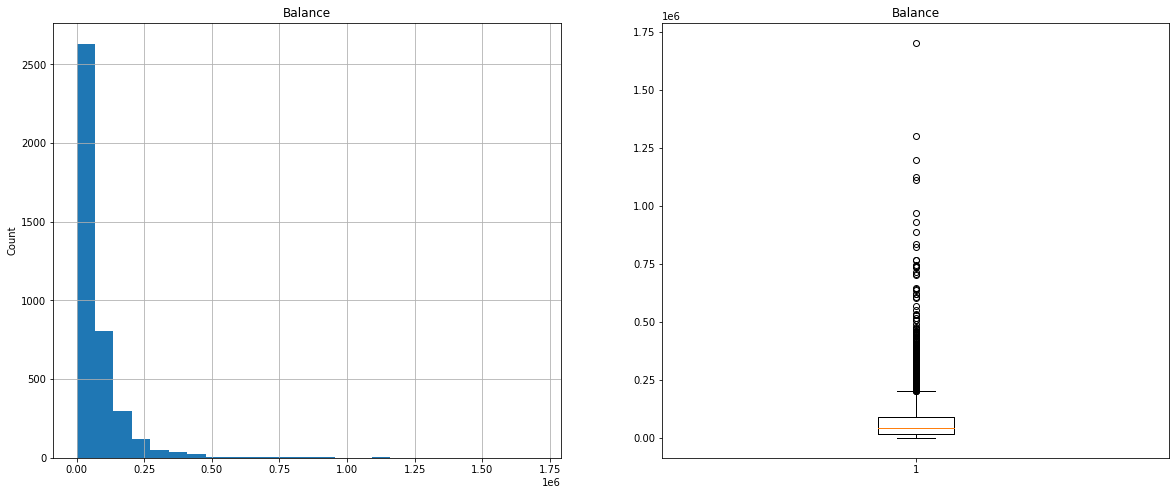

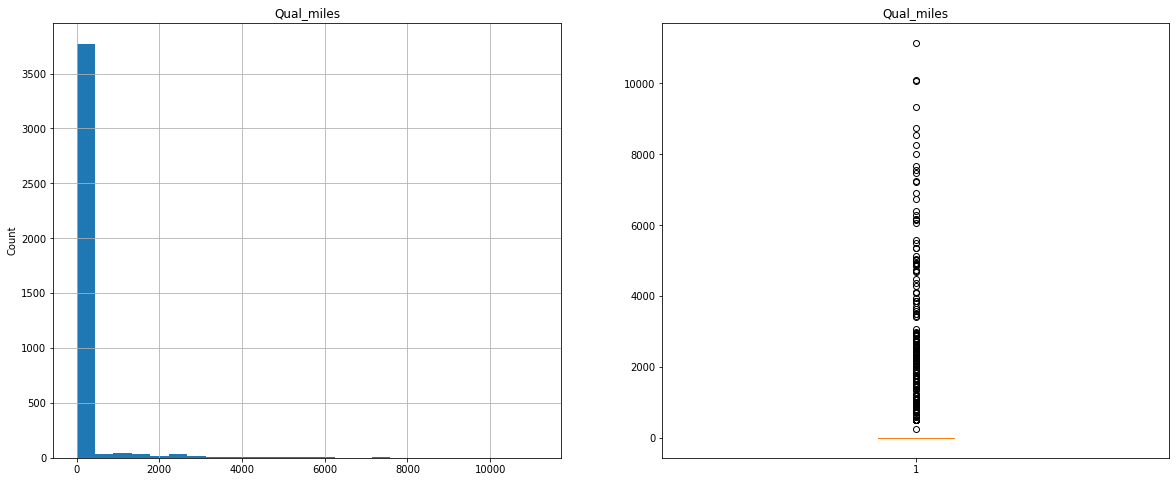

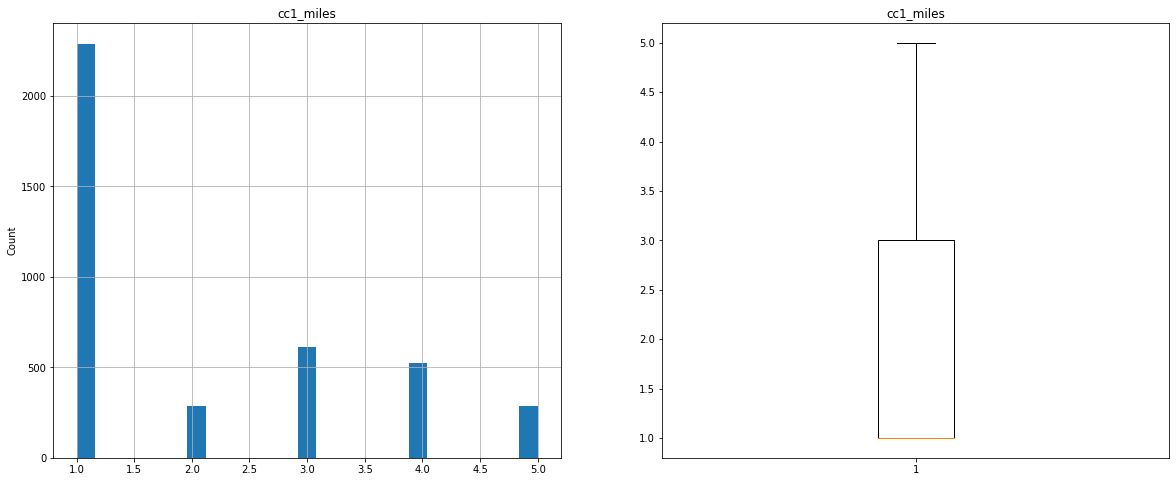

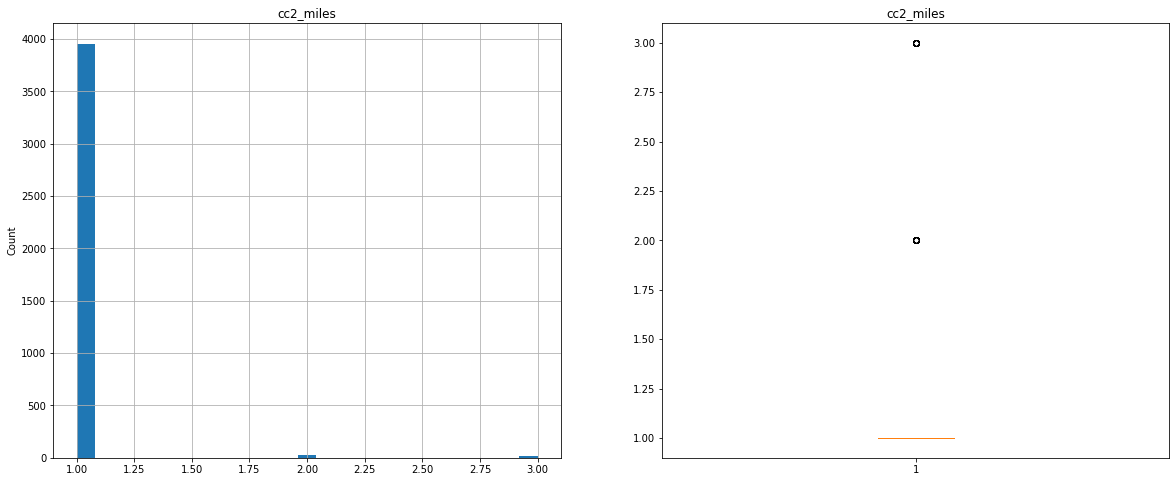

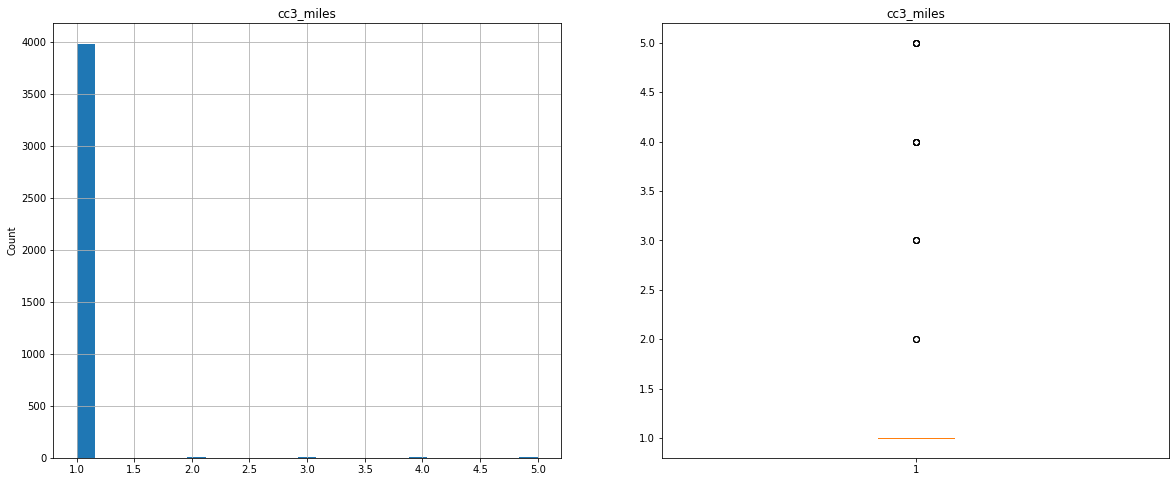

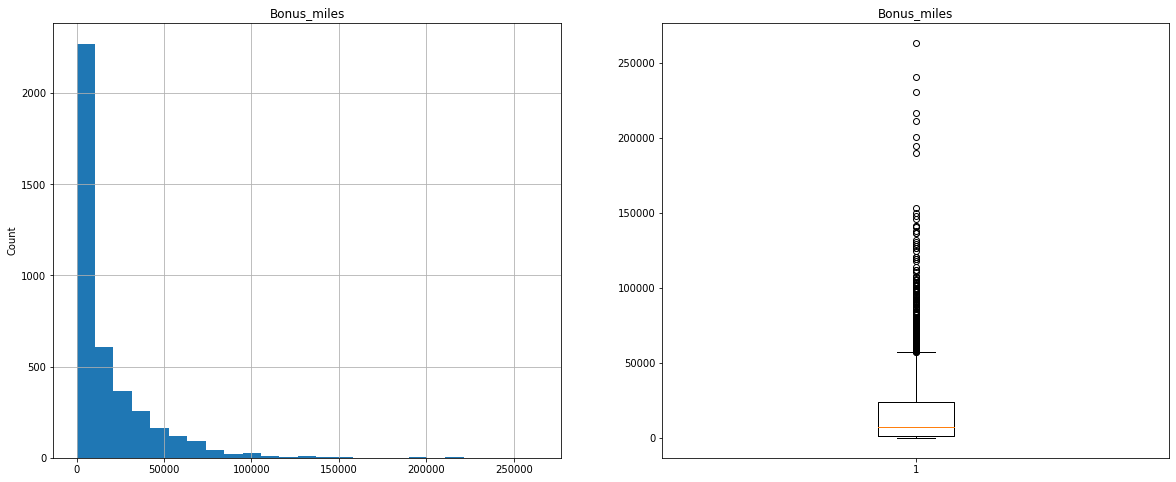

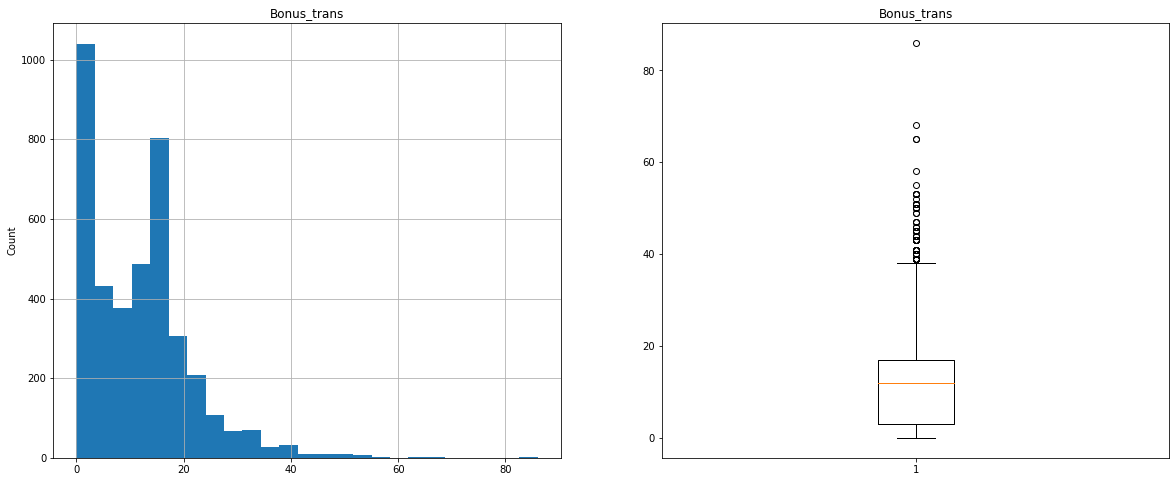

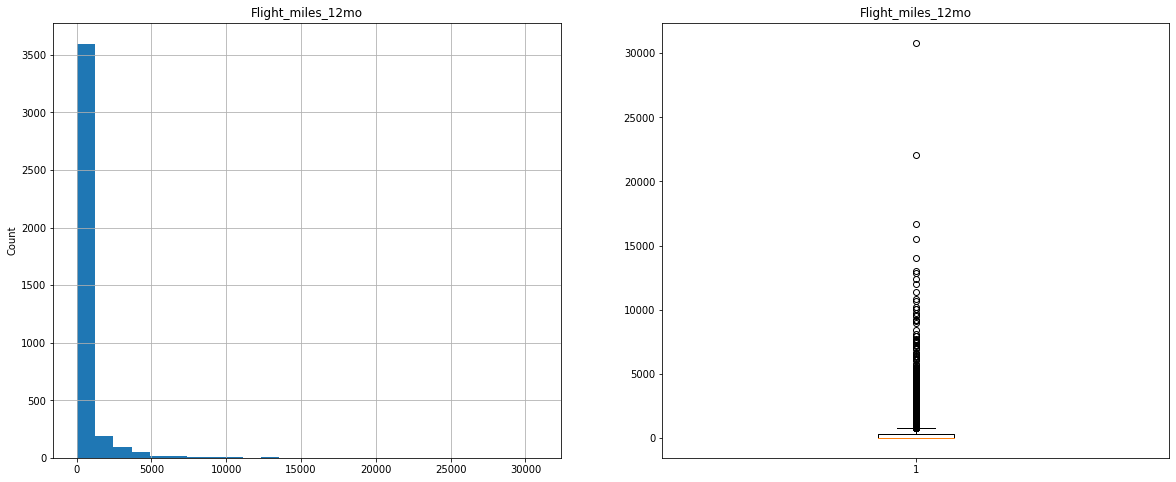

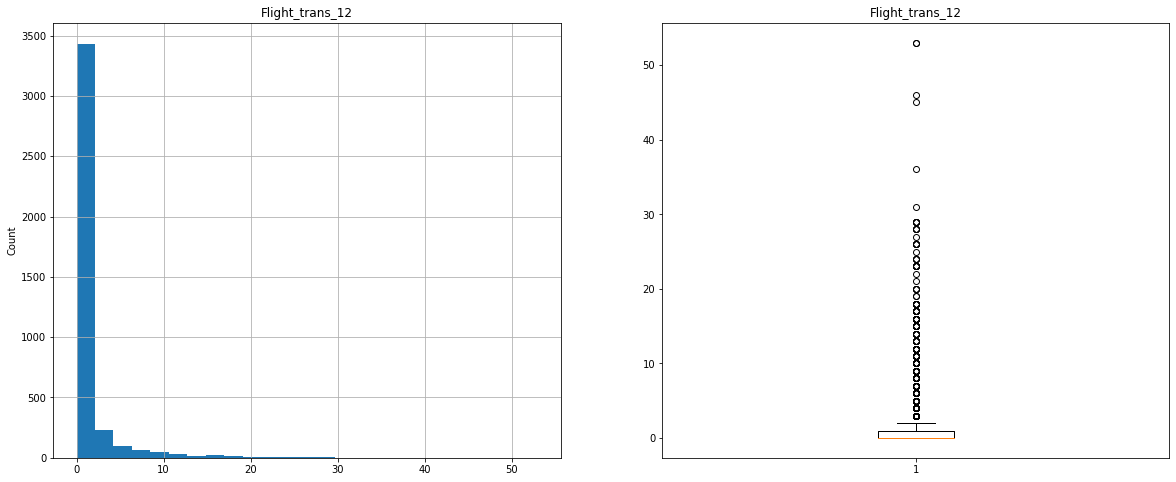

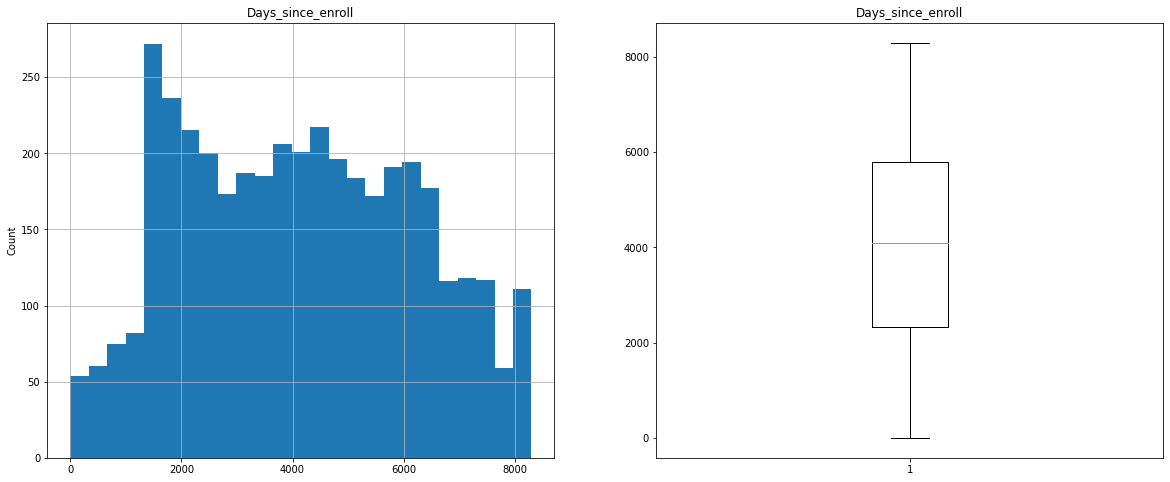

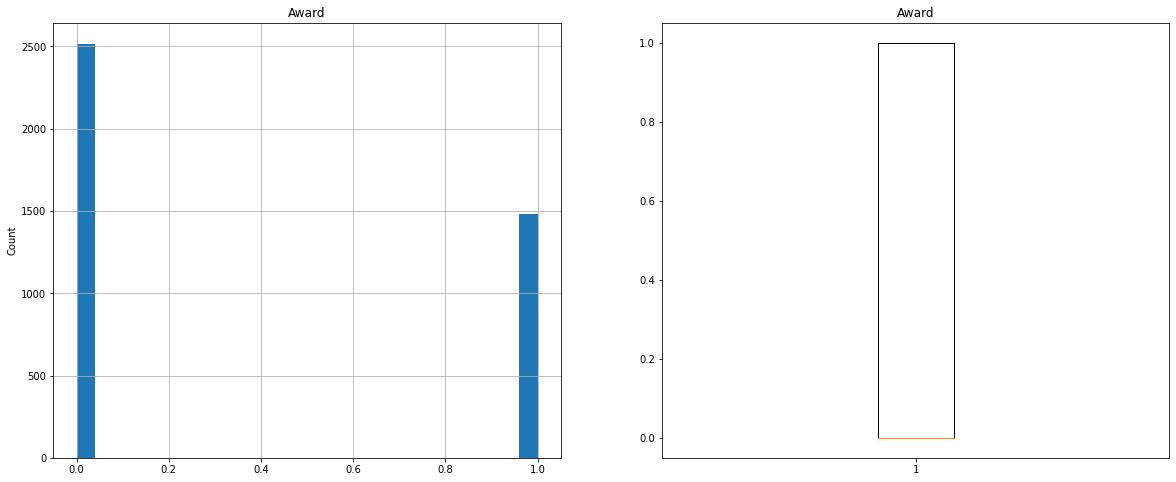

In [ ]:
for feature in airlines.columns:
    
    plt.figure(figsize=(20,8))
    
    plt.subplot(1,2,1)
    airlines[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    
    plt.subplot(1,2,2)
    plt.boxplot(airlines[feature])
    plt.title(feature)
    
    plt.show() 

In [ ]:
def norm_func(i):
    x = (i - i.min()) / (i.max() - i.min())
    return(x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
airlines_norm = norm_func(airlines)
airlines_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Id,,,,,,,,,,,
1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [ ]:
scaler = StandardScaler()
airlines_std = scaler.fit_transform(airlines) 
airlines_std

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

# **1) Hierarchical Clustering**

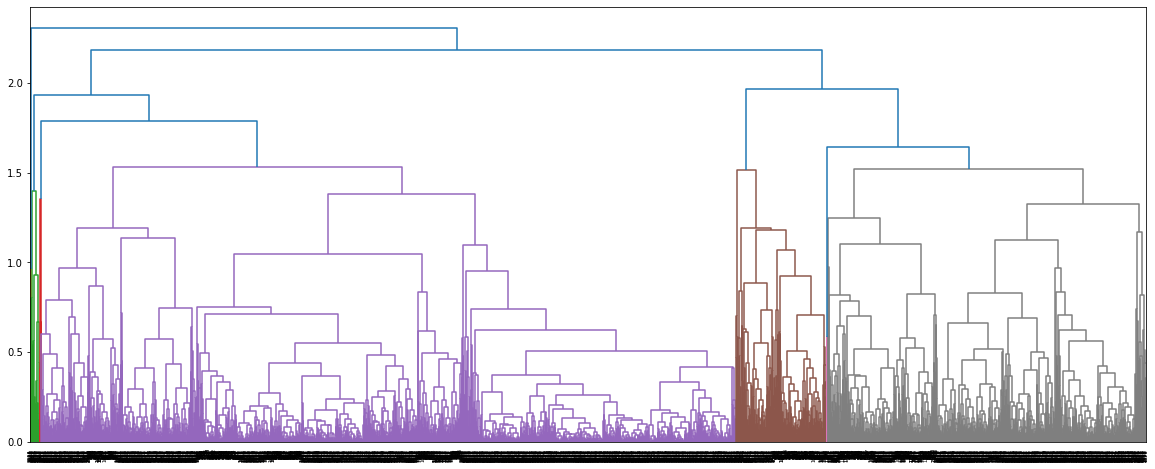

In [ ]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(airlines_norm, method= 'complete'))


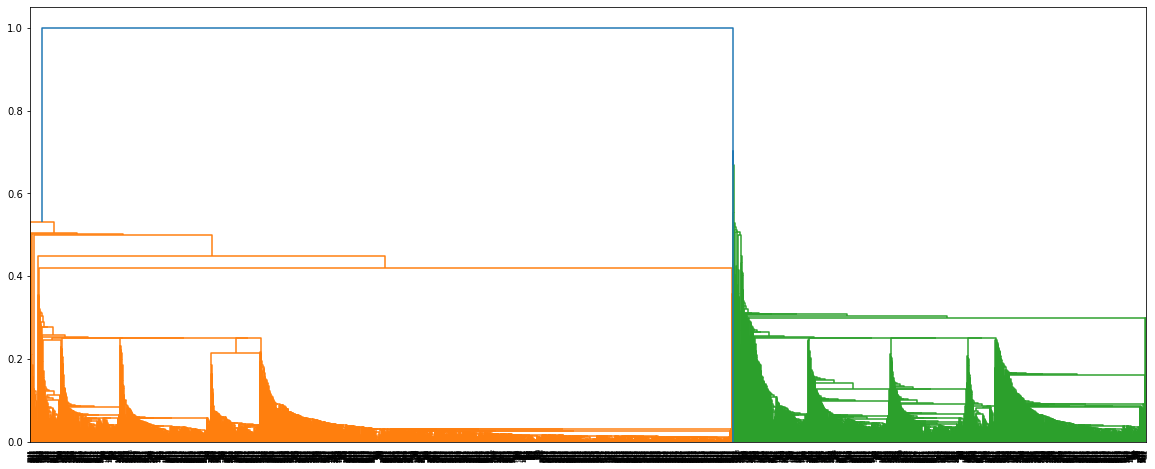

In [ ]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(airlines_norm, method= 'single'))

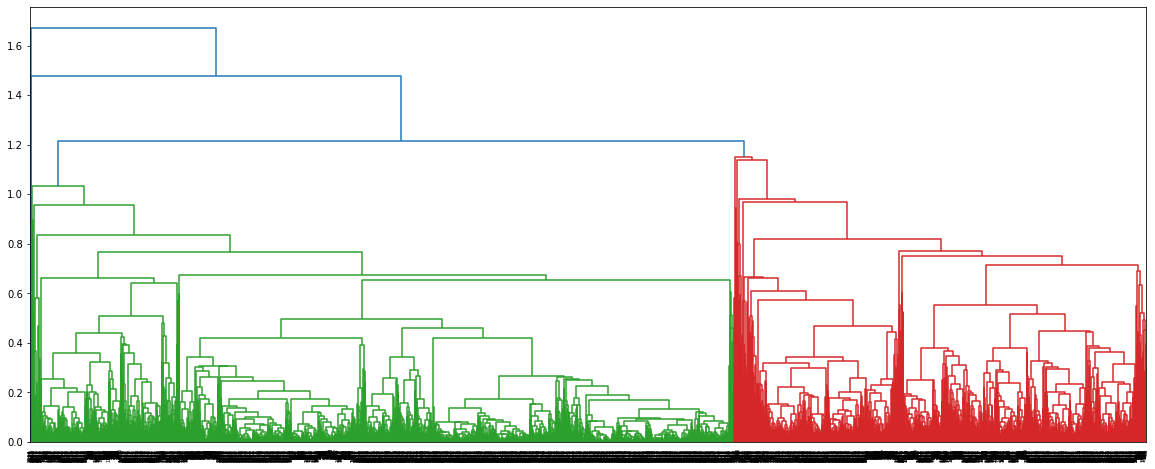

In [ ]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(airlines_norm, method= 'average'))

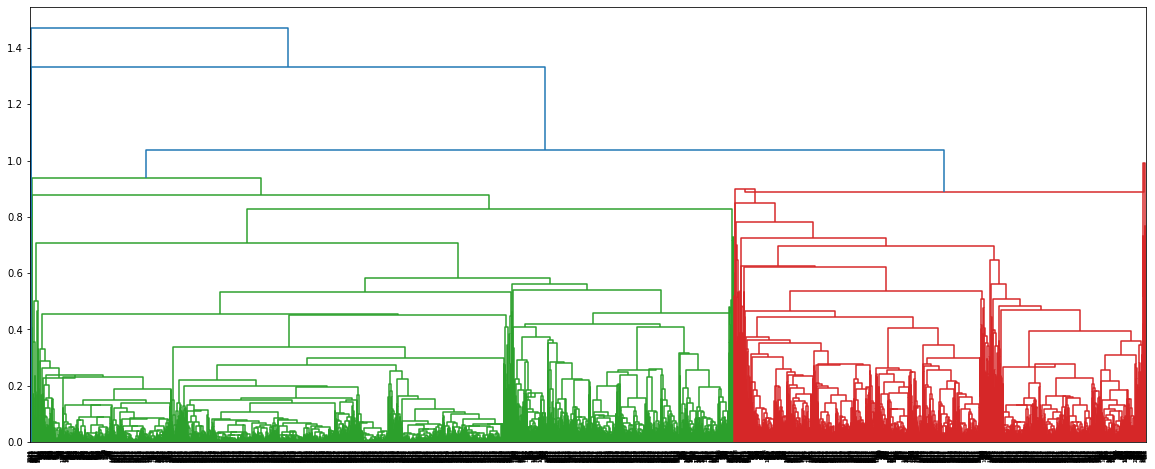

In [ ]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(airlines_norm, method= 'centroid'))


**Silhouette Score**

In [ ]:
linkages = ['complete' , 'single' , 'ward' , 'average']

for i in range (2,5):
    for x in linkages:
        hc=AgglomerativeClustering(n_clusters= i, linkage=x)
        y_hc=hc.fit_predict(airlines_norm)
        sil_score = sil(airlines_norm, y_hc)
        print('For n=',i,'and linkage =', x, 'Silhouette score is', np.round(sil_score,4))
 

For n= 2 and linkage = complete Silhouette score is 0.4704
For n= 2 and linkage = single Silhouette score is 0.5359
For n= 2 and linkage = ward Silhouette score is 0.5359
For n= 2 and linkage = average Silhouette score is 0.4704
For n= 3 and linkage = complete Silhouette score is 0.5318
For n= 3 and linkage = single Silhouette score is 0.5351
For n= 3 and linkage = ward Silhouette score is 0.4355
For n= 3 and linkage = average Silhouette score is 0.3961
For n= 4 and linkage = complete Silhouette score is 0.4645
For n= 4 and linkage = single Silhouette score is 0.4812
For n= 4 and linkage = ward Silhouette score is 0.4249
For n= 4 and linkage = average Silhouette score is 0.5286


**Silhouette score is maximum for**


For n= 2 and linkage = single Silhouette score is 0.5359

For n= 2 and linkage = ward Silhouette score is 0.5359

In [ ]:
# create clusters with single linkage and n_clusters = 2
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage= 'single')


In [ ]:
y_hc = hc.fit_predict(airlines_norm)
y_hc 

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
airlines['ClusterId_hc'] = y_hc
airlines 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterId_hc
Id,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [ ]:
airlines['ClusterId_hc'].value_counts()

1    2517
0    1481
Name: ClusterId_hc, dtype: int64

In [ ]:
airlines.groupby('ClusterId_hc').agg(['mean']).reset_index()

,ClusterId_hc,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
1,1,59831.203814,87.637267,1.705602,1.013905,1.008741,10231.752483,9.146603,226.382201,0.652761,3821.535558,0.0


**2) KMeans Clustering**

In [ ]:
wcss = []

for i in range (1, 16):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(airlines_std)
    wcss.append(kmeans.inertia_)
    
wcss 

[43977.999999999985,
 35402.34837621176,
 30893.111681651782,
 27148.665385482615,
 23696.28142175274,
 21086.325857898286,
 19877.921691970358,
 17315.91571034139,
 15961.46088573225,
 14725.185611004516,
 13704.877019618052,
 12945.293037319625,
 12426.457990719537,
 11974.043140119255,
 11562.614067481598]

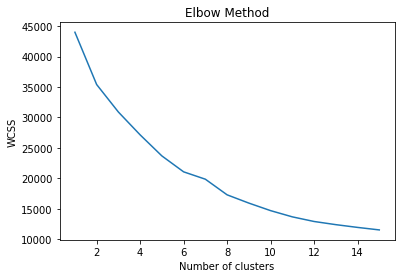

In [ ]:
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
for i in range (2,16):
        clusters = KMeans(n_clusters=i, random_state= 1)
        clusters.fit(airlines_std) 
        sil_score =sil(airlines_std , clusters.labels_ )
        print('For cluster =', i , 'The silhouette score is', sil_score)  


For cluster = 2 The silhouette score is 0.3257060145329871
For cluster = 3 The silhouette score is 0.3111038346820003
For cluster = 4 The silhouette score is 0.32048584058774454
For cluster = 5 The silhouette score is 0.32375619142546985
For cluster = 6 The silhouette score is 0.3327949137024568
For cluster = 7 The silhouette score is 0.26577652217528075
For cluster = 8 The silhouette score is 0.23669847546322711
For cluster = 9 The silhouette score is 0.29892167080233395
For cluster = 10 The silhouette score is 0.26152289188446176
For cluster = 11 The silhouette score is 0.2677620338174949
For cluster = 12 The silhouette score is 0.2747091046689006
For cluster = 13 The silhouette score is 0.2691925979169026
For cluster = 14 The silhouette score is 0.27041305382843694
For cluster = 15 The silhouette score is 0.27265461657652895


Silhouette score is maximum for n_clusters = 2

In [ ]:
clusters = KMeans(n_clusters=2, random_state= 1)
clusters.fit(airlines_std)

KMeans(n_clusters=2, random_state=1)

In [ ]:
clusters.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
airlines['Clusterid_kmeans'] = clusters.labels_ 
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterId_hc,Clusterid_kmeans
Id,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1


In [ ]:
airlines['Clusterid_kmeans'].value_counts()

1    2699
0    1299
Name: Clusterid_kmeans, dtype: int64

In [ ]:
airlines.groupby('Clusterid_kmeans').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterId_hc
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Clusterid_kmeans,,,,,,,,,,,,
0,132849.454965,258.394149,3.612009,1.010008,1.036952,41481.426482,20.393380,969.467283,2.909161,4941.665127,0.709777,0.290223
1,45112.733235,89.166358,1.312708,1.016673,1.000371,5438.261208,7.374954,215.051871,0.635050,3723.341608,0.207114,0.792886


Optimum no. of clusters is 2

Cluster0 indicates the group of fliers that earn the most out of the card and are frequent fliers

Cluster1 indicates the group of fliers that earn the least and are the least frequent fliers

**3)DBSCAN**

In [ ]:
df=pd.DataFrame()
epss=[]
min_sample=[]
sil_scores=[]

In [ ]:
eps = [0.25,0.5,0.75,1.00,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0]
min_samples = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

for i in range (len(eps)):
    for j in range (len(min_samples)):
        dbscan = DBSCAN(eps=eps[i] , min_samples=min_samples[j])
        dbscan.fit(airlines_std)
        sil_score=sil(airlines_std, dbscan.labels_)
        epss.append(eps[i])
        min_sample.append(min_samples[j])
        sil_scores.append(sil_score)

In [ ]:
df['eps']=epss
df['min_sample']=min_sample
df['sil_scores']=sil_scores

In [ ]:
df['sil_scores'].max() 

0.6454683428134459

In [ ]:
df['sil_scores'].idxmax()

252

In [ ]:
df.iloc[252:253, :]

,eps,min_sample,sil_scores
252,2.75,24,0.645468


Silhouette score is maximum for eps = 2.75 and min_sample = 24

In [ ]:
dbscan = DBSCAN(eps= 2.75, min_samples=24)
dbscan.fit(airlines_std) 

DBSCAN(eps=2.75, min_samples=24)

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_ 

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
airlines['Noise'] = dbscan.labels_ 
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterId_hc,Clusterid_kmeans,Noise
Id,,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,1,0
2,19244,0,1,1,1,215,2,0,0,6968,0,1,1,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,0
4,14776,0,1,1,1,500,1,0,0,6952,0,1,1,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0,0


In [ ]:
airlines.Noise.value_counts()
#184 data points are categorised as noise

 0    3814
-1     184
Name: Noise, dtype: int64

In [ ]:
df=airlines.groupby('Noise').agg('mean')
df 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterId_hc,Clusterid_kmeans
Noise,,,,,,,,,,,,,
-1,220448.108696,1568.804348,2.418478,1.315217,1.266304,45862.885870,24.472826,3278.190217,9.228261,4669.641304,0.679348,0.320652,0.250000
0,66535.987677,75.420556,2.042475,1.000000,1.000000,15763.888044,10.984006,324.220241,0.995018,4092.634504,0.355532,0.644468,0.695595


# **crime_data**

In [19]:
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering , KMeans , DBSCAN
from sklearn.metrics import silhouette_score as sil 
from sklearn.preprocessing import StandardScaler 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [20]:
crime = pd.read_csv('crime_data.csv')
crime.head() 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [21]:
crime.rename(columns = {'Unnamed: 0':'States'},  inplace = True)
crime.head() 

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [22]:
crime.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [23]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [24]:
crime.duplicated().sum()

0

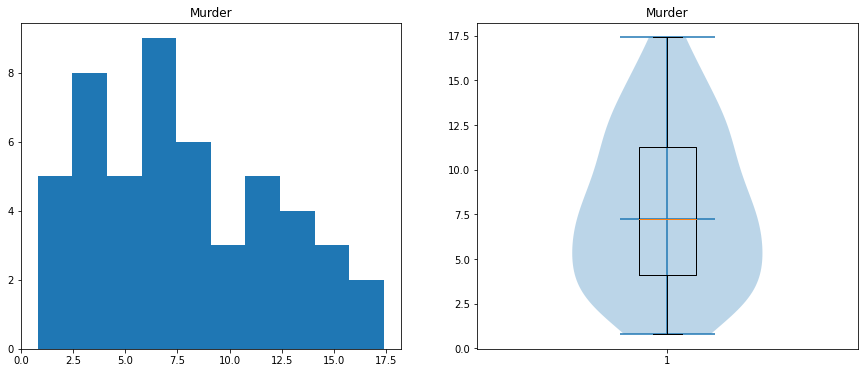

In [25]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(crime.Murder)
plt.title('Murder')

plt.subplot(1,2,2)
plt.violinplot(crime.Murder,showmedians=True)
plt.boxplot(crime.Murder)
plt.title('Murder')
plt.show()


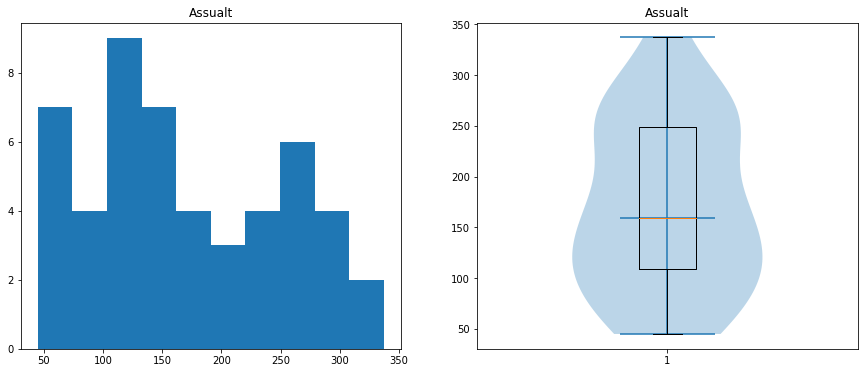

In [26]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(crime.Assault)
plt.title('Assualt')

plt.subplot(1,2,2)
plt.violinplot(crime.Assault,showmedians=True)
plt.boxplot(crime.Assault)
plt.title('Assualt')
plt.show()

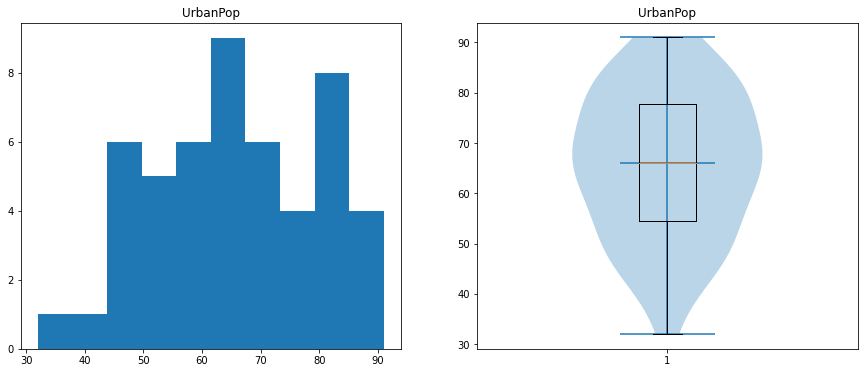

In [27]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(crime.UrbanPop)
plt.title('UrbanPop')

plt.subplot(1,2,2)
plt.violinplot(crime.UrbanPop,showmedians=True)
plt.boxplot(crime.UrbanPop)
plt.title('UrbanPop')
plt.show()

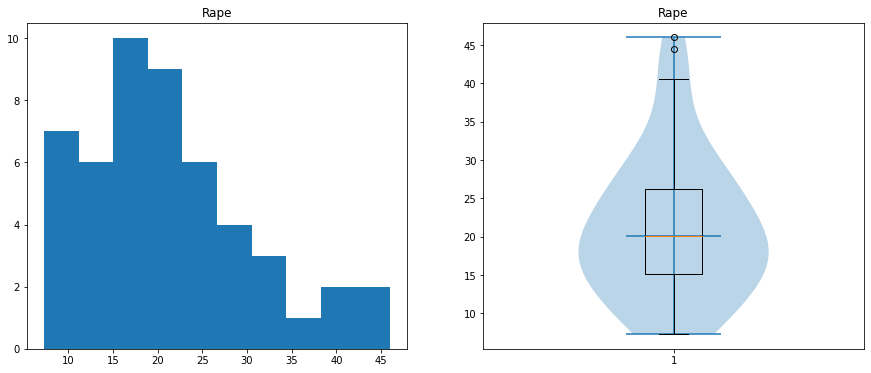

In [28]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(crime.Rape)
plt.title('Rape')

plt.subplot(1,2,2)
plt.violinplot(crime.Rape,showmedians=True)
plt.boxplot(crime.Rape)
plt.title('Rape')
plt.show()


In [29]:
def norm_func(i):
    x = (i - i.min()) / (i.max() - i.min())
    return(x)

In [30]:
# Normalized data frame (considering the numerical part of data)
crime_norm = norm_func(crime.iloc[:,1:])
crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [31]:
scaler = StandardScaler()
crime_std = scaler.fit_transform(crime.iloc[:,1:]) 
crime_std 

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

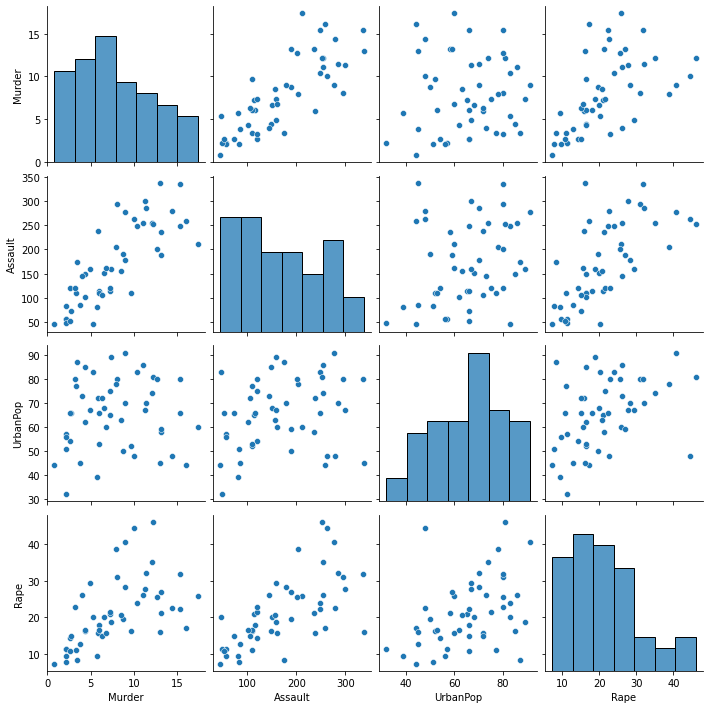

In [32]:
sns.pairplot(crime)

# **Hierarchical Clustering**

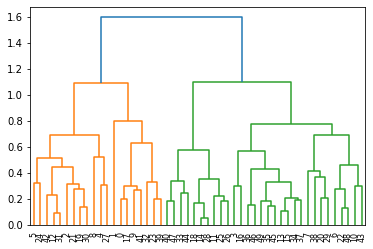

In [33]:
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method= 'complete'))

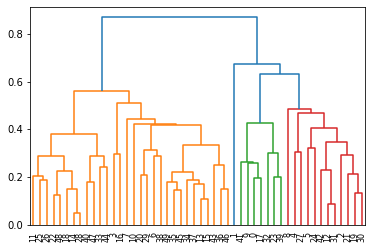

In [34]:
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method= 'average'))

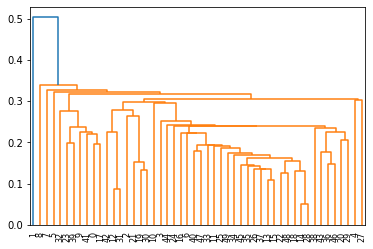

In [35]:
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method= 'single'))

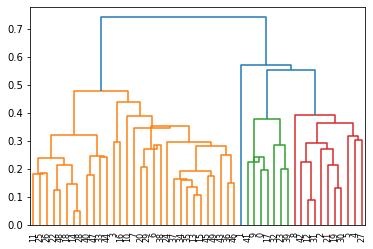

In [36]:
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method= 'centroid'))

from above different dendrogram **complete linkage** looks simpler so we take that in model.

In [38]:
# lets check the silhoutte score for n_cluster

for i in range (2,8):
    hc = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='complete')
    y_hc = hc.fit_predict(crime_norm)
    sil_score = sil(crime_norm, y_hc)
    print('For cluster =', i, 'the silhoutte score is', sil_score)


For cluster = 2 the silhoutte score is 0.42364457559625074
For cluster = 3 the silhoutte score is 0.30877213909512063
For cluster = 4 the silhoutte score is 0.30607294424263076
For cluster = 5 the silhoutte score is 0.3056360903608855
For cluster = 6 the silhoutte score is 0.27284356597794224
For cluster = 7 the silhoutte score is 0.2738764216820654


In [39]:
# create clusters with complete linkage and n_clusters = 2
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage= 'complete')

In [41]:
y_hc = hc.fit_predict(crime_norm)
y_hc

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [43]:
crime['ClusterId_hc']= y_hc
crime.head()

,States,Murder,Assault,UrbanPop,Rape,ClusterId_hc
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [44]:
crime['ClusterId_hc'].value_counts()

0    30
1    20
Name: ClusterId_hc, dtype: int64

In [45]:
crime.groupby('ClusterId_hc').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
ClusterId_hc,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


Optimum no. of clusters is 2

As we can see from above table, states with clusterid 0 are relatively safer as compared to states with clusterid 1

In [52]:
name = input('What is name of your state? \n')

What is name of your state? 
South Dakota


In [53]:
for i in range (0, len(crime)): 
    if name == crime.States[i]:
        print('Your state is category', crime.ClusterId_hc[i], 'state') 
        if crime.ClusterId_hc[i] == 0:
            print('Your state is safe state')
        else:
            print('Your state is in danger zone')

Your state is category 0 state
Your state is safe state


# **K-Means**

In [54]:
wcss = []

for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(crime_std)
    wcss.append(kmeans.inertia_)
    
wcss 

[200.00000000000003,
 104.96163315756871,
 80.0888613219962,
 57.55425863091105,
 50.52026552535068,
 43.927464044975736,
 40.52183461131976,
 34.68738839784909,
 32.70648136388185,
 28.311639397122548]

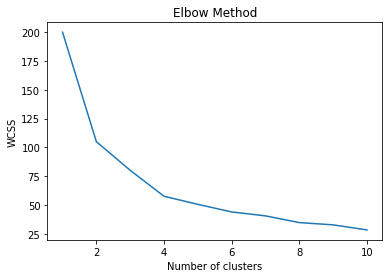

In [55]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [56]:
for i in range (2,8):
        clusters = KMeans(n_clusters=i, random_state= 1)
        clusters.fit(crime_std) 
        sil_score =sil(crime_std , clusters.labels_ )
        print('For cluster =', i , 'The silhouette score is', sil_score)  


For cluster = 2 The silhouette score is 0.4084890326217641
For cluster = 3 The silhouette score is 0.30813622648945616
For cluster = 4 The silhouette score is 0.33968891433344395
For cluster = 5 The silhouette score is 0.2968626678243933
For cluster = 6 The silhouette score is 0.2797372888992387
For cluster = 7 The silhouette score is 0.24929596022381695


In [57]:
clusters = KMeans(n_clusters=2, random_state= 1)
clusters.fit(crime_std)

KMeans(n_clusters=2, random_state=1)

In [58]:
clusters.labels_ 

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [59]:
crime['ClusterId_kmeans'] = clusters.labels_ 
crime 

,States,Murder,Assault,UrbanPop,Rape,ClusterId_hc,ClusterId_kmeans
0,Alabama,13.2,236,58,21.2,1,1
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,0,0
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,1,1


In [60]:
crime.groupby('ClusterId_kmeans').agg(['mean']) 

,Murder,Assault,UrbanPop,Rape,ClusterId_hc
,mean,mean,mean,mean,mean
ClusterId_kmeans,,,,,
0,4.870,114.433333,63.633333,15.943333,0.0
1,12.165,255.250000,68.400000,29.165000,1.0


Optimum no. of clusters is 2

As we can see from above table, states with clusterid 0 are relatively safer as compared to states with clusterid 1

In [61]:
name = input('What is name of your state? \n') 

What is name of your state? 
New York


In [62]:
for i in range (0, len(crime)): 
    if name == crime.States[i]:
        print('Your state is category', crime.ClusterId_kmeans[i], 'state') 
        if crime.ClusterId_kmeans[i] == 0:
            print('Your state is safe state')
        else:
            print('Your state is in danger zone') 

Your state is category 1 state
Your state is in danger zone


# **DBSCAN**

In [64]:
eps = [0.25,0.5,0.75,1.00,1.25,1.5,1.75,2.00]
min_samples = [1,2]

for i in range (len(eps)):
    for j in range (len(min_samples)):
        dbscan = DBSCAN(eps=eps[i] , min_samples=min_samples[j])
        dbscan.fit(crime_std)
        sil_score=sil(crime_std, dbscan.labels_)
        print('for eps=', eps[i], 'and min_samples=', min_samples[j] , 'sil_score is', sil_score) 

for eps= 0.25 and min_samples= 1 sil_score is 0.02524285085226844
for eps= 0.25 and min_samples= 2 sil_score is 0.038817626029398714
for eps= 0.5 and min_samples= 1 sil_score is 0.06502546728043575
for eps= 0.5 and min_samples= 2 sil_score is -0.2689925316677858
for eps= 0.75 and min_samples= 1 sil_score is -0.015304812731762202
for eps= 0.75 and min_samples= 2 sil_score is -0.09728961540145159
for eps= 1.0 and min_samples= 1 sil_score is 0.0011630308334708251
for eps= 1.0 and min_samples= 2 sil_score is 0.19290975823254836
for eps= 1.25 and min_samples= 1 sil_score is 0.21127138005172738
for eps= 1.25 and min_samples= 2 sil_score is 0.2257103196361524
for eps= 1.5 and min_samples= 1 sil_score is 0.23455598753159795
for eps= 1.5 and min_samples= 2 sil_score is 0.23455598753159795
for eps= 1.75 and min_samples= 1 sil_score is 0.23455598753159795
for eps= 1.75 and min_samples= 2 sil_score is 0.23455598753159795
for eps= 2.0 and min_samples= 1 sil_score is 0.23455598753159795
for eps= 2.0

for eps= 1.5 and min_samples= 1 ---> sil_score is 0.2345

In [65]:
dbscan = DBSCAN(eps= 1.5, min_samples=1)
dbscan.fit(crime_std)

DBSCAN(eps=1.5, min_samples=1)

In [66]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

-1 are the noise points in our dataset and remaining are part of cluster.

In [67]:
crime['Noise'] = dbscan.labels_
crime.head()

,States,Murder,Assault,UrbanPop,Rape,ClusterId_hc,ClusterId_kmeans,Noise
0,Alabama,13.2,236,58,21.2,1,1,0
1,Alaska,10.0,263,48,44.5,1,1,1
2,Arizona,8.1,294,80,31.0,1,1,0
3,Arkansas,8.8,190,50,19.5,0,0,0
4,California,9.0,276,91,40.6,1,1,0


In [68]:
df = crime.groupby('Noise').agg('mean')
df #Ignore last 2 columns

,Murder,Assault,UrbanPop,Rape,ClusterId_hc,ClusterId_kmeans
Noise,,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.387755,0.387755
1,10.000000,263.000000,48.000000,44.500000,1.000000,1.000000


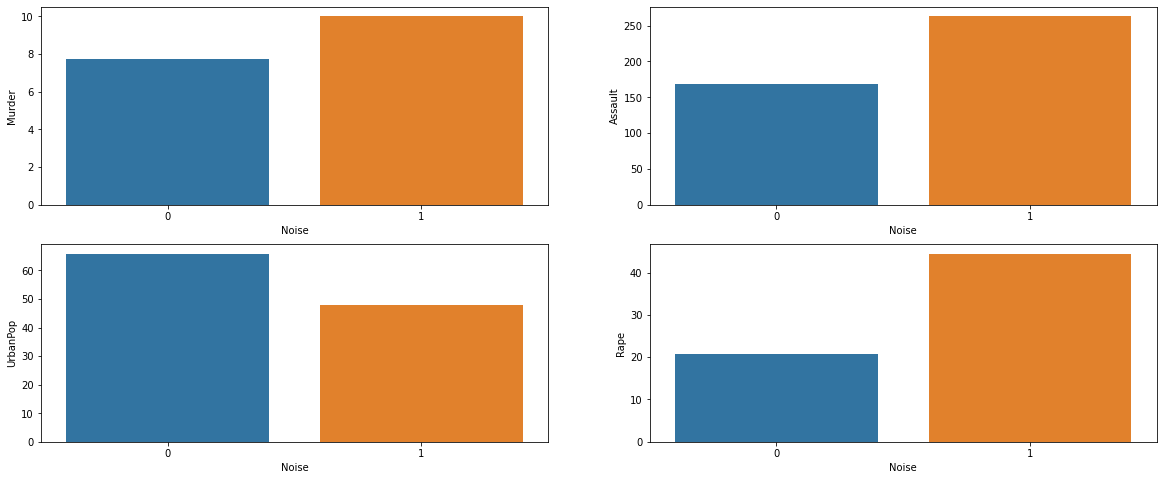

In [69]:
plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
sns.barplot(x=df.index , y=df.Murder)

plt.subplot(2,2,2)
sns.barplot(x=df.index , y=df.Assault)

plt.subplot(2,2,3)
sns.barplot(x=df.index , y=df.UrbanPop)

plt.subplot(2,2,4)
sns.barplot(x=df.index , y=df.Rape)